In [ ]:
import pandas as pd

df = pd.read_csv("combined.csv")
# df2 = pd.read_csv("/content/drive/MyDrive/Agri.csv")
# df = pd.concat([df1, df2])
df = df[~df.index.duplicated(keep = 'first')]

In [2]:
df.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0.0,188,1,0,1,0,0.0,0,1,0
1,1.0,209,1,0,1,0,0.0,0,2,1
2,2.0,257,1,0,1,0,0.0,0,2,1
3,3.0,257,1,1,1,0,0.0,0,2,1
4,4.0,342,1,0,1,0,0.0,0,2,1
5,5.0,448,0,1,1,0,NaN,0,2,1
6,6.0,448,0,1,1,0,NaN,0,2,1
7,7.0,577,1,0,1,0,0.0,0,1,2
8,8.0,731,0,0,1,0,0.0,0,2,0
9,9.0,1132,1,0,1,0,0.0,0,1,2


In [3]:
#Examining the last 10 rows,columns,values of the dataset
df.tail(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
1048565,NaN,1423,3,0,3,0,0.0,0,1,0
1048566,NaN,227,2,3,3,0,0.0,0,1,0
1048567,NaN,423,0,5,3,0,0.0,0,1,0
1048568,NaN,1165,2,1,3,0,0.0,0,1,0
1048569,NaN,1971,1,2,3,0,0.0,0,1,0
1048570,NaN,1210,0,0,3,0,0.0,0,1,1
1048571,NaN,1786,4,4,3,0,0.0,0,1,0
1048572,NaN,800,4,1,3,0,0.0,0,1,0
1048573,NaN,689,2,5,3,0,0.0,0,1,1
1048574,NaN,997,5,1,3,0,0.0,0,1,0


In [4]:
#df.values represents values row-by-row in the form of arrays
df.values

array([[  0., 188.,   1., ...,   0.,   1.,   0.],
       [  1., 209.,   1., ...,   0.,   2.,   1.],
       [  2., 257.,   1., ...,   0.,   2.,   1.],
       ...,
       [ nan, 800.,   4., ...,   0.,   1.,   0.],
       [ nan, 689.,   2., ...,   0.,   1.,   1.],
       [ nan, 997.,   5., ...,   0.,   1.,   0.]])

In [5]:
#Identifying the datatypes of all the features
df.dtypes

ID                         float64
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [6]:
#Replacing missing values with the mean
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace = True)

C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_22608\3209732914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace = True)


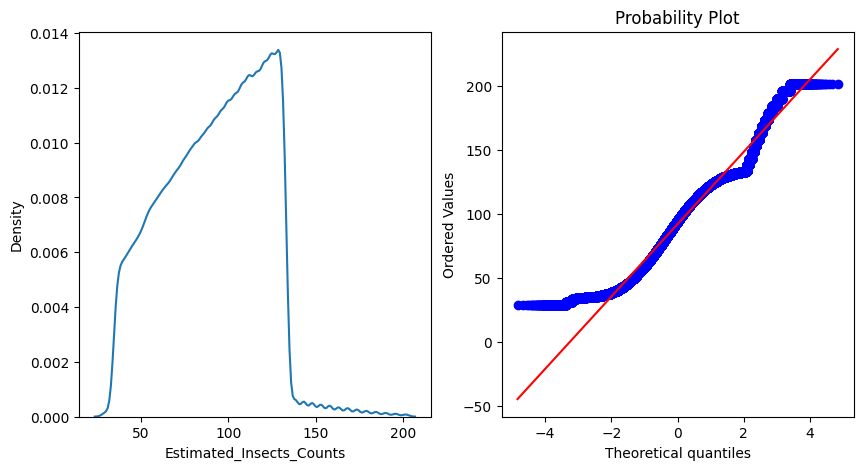

In [7]:
#Function to return plots for the feature
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt 
import seaborn as sns


def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()
    
#Converting Estimated Insects Count feature to Normal Distribution using Box-Cox transform
#Plotting to check the transformation
df['Estimated_Insects_Counts'], parameters = stats.boxcox(df['Estimated_Insects_Count'])
normality(df,'Estimated_Insects_Counts')

In [8]:
df[df.index.duplicated()]

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Estimated_Insects_Counts


In [9]:
import numpy as np
df.loc[df['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.mean(df["Number_Weeks_Used"])
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])
df.loc[df['Number_Doses_Week']>80,'Number_Doses_Week'] = np.mean(df["Number_Doses_Week"])
df.drop(columns = ["Estimated_Insects_Count"], axis = 1, inplace = True)

C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_22608\1763295693.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1124.7379529361276' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])
C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_22608\1763295693.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8126714827265574' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])
C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_22608\1763295693.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pan

In [10]:
#Creating predictors and Target
y = df['Crop_Damage']
X = df.drop(columns = ['Crop_Damage'])

#Performing Train Test split using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state = 0)

In [ ]:
#We do encoding for nominal data so I used get_dummies method
X_train = pd.get_dummies(data = X_train, columns = ["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_train.head(10)

,ID,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Estimated_Insects_Counts,Season_1,Season_2,Season_3,Pesticide_Use_Category_1,Pesticide_Use_Category_2,...,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Crop_Type_0,Crop_Type_1,Crop_Type_2,Crop_Type_3,Crop_Type_4,Crop_Type_5
123313,NaN,0.0,0.0,0.0,69.869625,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
235240,NaN,0.0,0.0,0.0,110.820020,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
611153,NaN,0.0,0.0,0.0,109.311830,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
448929,NaN,0.0,0.0,0.0,77.208506,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
999346,NaN,0.0,0.0,0.0,48.044740,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
86269,86269.0,15.0,14.0,37.0,143.128227,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
515500,NaN,0.0,0.0,0.0,121.890619,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
261536,NaN,0.0,0.0,0.0,63.724634,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
712108,NaN,0.0,0.0,0.0,86.529692,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
935141,NaN,0.0,0.0,0.0,112.618825,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [12]:
#Let us normalize values for features(Number_Doses_Week,	Number_Weeks_Used,	Number_Weeks_Quit,	Estimated_Insects_Counts)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [13]:
#Checking normalized values by creating a dataframe
from pandas import DataFrame
X_train_df = DataFrame(X_train)
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,NaN,0.0000,0.000000,0.000,0.237310,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,NaN,0.0000,0.000000,0.000,0.474674,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0.0000,0.000000,0.000,0.465932,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,NaN,0.0000,0.000000,0.000,0.279849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,NaN,0.0000,0.000000,0.000,0.110805,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.970875,0.1875,0.254545,0.925,0.661945,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,NaN,0.0000,0.000000,0.000,0.538844,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,NaN,0.0000,0.000000,0.000,0.201691,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,NaN,0.0000,0.000000,0.000,0.333878,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,NaN,0.0000,0.000000,0.000,0.485101,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
#Performed feature encoding to the X_test feature using get_dummies and then transformed
X_test = pd.get_dummies(data = X_test, columns=["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_test = scaler.transform(X_test)

In [15]:
#Creating a dataframe from normalized values of test dataset
X_test_df = DataFrame(X_test)
X_test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,NaN,0.0,0.0,0.0,0.299878,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,NaN,0.0,0.0,0.0,0.517379,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.437017,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,NaN,0.0,0.0,0.0,0.514692,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,0.0,0.0,0.0,0.447911,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,NaN,0.0,0.0,0.0,0.159189,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,NaN,0.0,0.0,0.0,0.526120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,NaN,0.0,0.0,0.0,0.514447,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,NaN,0.0,0.0,0.0,0.287147,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,NaN,0.0,0.0,0.0,0.400911,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
#Train Test Split
X_train_net, X_test_net, y_train_net, y_test_net = train_test_split(X, y, train_size=0.65, random_state = 0)

In [17]:
#We do encoding for nominal data so I used get_dummies method
X_train_net = pd.get_dummies(data = X_train_net, columns = ["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_train_net.head(10)

,ID,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Estimated_Insects_Counts,Season_1,Season_2,Season_3,Pesticide_Use_Category_1,Pesticide_Use_Category_2,...,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Crop_Type_0,Crop_Type_1,Crop_Type_2,Crop_Type_3,Crop_Type_4,Crop_Type_5
123313,NaN,0.0,0.0,0.0,69.869625,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
235240,NaN,0.0,0.0,0.0,110.820020,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
611153,NaN,0.0,0.0,0.0,109.311830,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
448929,NaN,0.0,0.0,0.0,77.208506,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
999346,NaN,0.0,0.0,0.0,48.044740,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
86269,86269.0,15.0,14.0,37.0,143.128227,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
515500,NaN,0.0,0.0,0.0,121.890619,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
261536,NaN,0.0,0.0,0.0,63.724634,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
712108,NaN,0.0,0.0,0.0,86.529692,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
935141,NaN,0.0,0.0,0.0,112.618825,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [18]:
feature_columns = [
    'Estimated_Insects_Count',
    'Crop_Type',
    'Soil_Type',
    'Pesticide_Use_Category',
    'Number_Doses_Week',
    'Number_Weeks_Used',
    'Number_Weeks_Quit',
    'Season'
]
# X_train_net = df[feature_columns]
# y_train_net = df['Crop_Damage']

print(X_train_net.shape)  # Should be (n_samples, 8)
print(y_train_net.shape)  # Should be (n_samples,)



(681573, 23)
(681573,)


*ID: UniqueID*

*Estimated_Insects_Count: Estimated insects count per square meter*

*Crop_Type: Category of Crop(0,1)*

*Soil_Type: Category of Soil (0,1)*

*Pesticide_Use_Category: Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)*

*Number_Doses_Week: Number of doses per week* 

*Number_Weeks_Used: Number of weeks used*

*Number_Weeks_Quit: Number of weeks quit*

*Season: Season Category (1,2,3)*

*Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)*

In [19]:
#Let us normalize values for features(Number_Doses_Week,	Number_Weeks_Used,	Number_Weeks_Quit,	Estimated_Insects_Counts)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_net = scaler.fit_transform(X_train_net)

In [20]:
#Importing libraries for Neural Nets
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.models import Model
import tensorflow as tf

In [21]:
# Define the keras model

input_dim = X_train_net.shape[1]  # Automatically use correct input size
model = Sequential()
model.add(Dense(24, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform'))
# model = Sequential()
# model.add(Dense(24, input_dim =8, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(48, activation = 'relu', kernel_initializer = 'glorot_uniform'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'glorot_uniform'))
model.add(Dense(96, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(3, activation='softmax'))

C:\Users\IdeaPad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,019 (125.07 KB)

 Trainable params: 32,019 (125.07 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Compile the keras model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
#Fit the keras model on the dataset
model.fit(X_train_net, y_train_net, epochs = 7, batch_size = 16)

Epoch 1/7
42599/42599 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.8447 - loss: 0.4471
Epoch 2/7
42599/42599 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - accuracy: 0.8450 - loss: 0.4431
Epoch 3/7
42599/42599 ━━━━━━━━━━━━━━━━━━━━ 102s 2ms/step - accuracy: 0.8452 - loss: 0.4425
Epoch 4/7
42599/42599 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - accuracy: 0.8456 - loss: 0.4416
Epoch 5/7
42599/42599 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - accuracy: 0.8455 - loss: 0.4423
Epoch 6/7
42599/42599 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.8449 - loss: 0.4434
Epoch 7/7
42599/42599 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.8453 - loss: 0.4429


In [25]:
#Evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

11469/11469 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8459 - loss: 0.4412
Accuracy: 84.57


In [26]:
#Make probability predictions with the model
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
print(rounded)

11469/11469 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
import numpy as np
y_mod = np.array(y).reshape((X.shape[0],1))
y_mod.shape

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y_mod)

#Performing Train Test split using sklearn library
from sklearn.model_selection import train_test_split
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y, train_size = 0.65, random_state = 0)

In [ ]:
# ANN model with Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert target to one-hot encoding
y_train_cat = to_categorical(y_train_dep)
y_test_cat = to_categorical(y_test_dep)

# Define the ANN model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_dep.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_dep, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_dep, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict classes
y_pred = model.predict(X_test_dep)
y_pred_classes = y_pred.argmax(axis=1)

# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_dep, y_pred_classes))
print(confusion_matrix(y_test_dep, y_pred_classes))

# Save model
model.save("Bayer_Crop_Science_Nov2021_DSInterview_ANN.h5")
